In [11]:
import numpy as np 
import pandas as pd

from keras import models, layers, Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten
from keras.preprocessing.image import *
from tensorflow.keras.optimizers import Adam

In [2]:
df_train = pd. read_csv("train_digit.csv")
df_train. head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test = pd. read_csv("test_digit.csv")
df_test. head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Splitting data into features and labels
pixel_data = df_train. iloc[:, 1:785]
label = df_train["label"]
number = np. array(pixel_data)
number = number. reshape(len(pixel_data),28, 28,1)

In [6]:
pixel_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Value is:0')

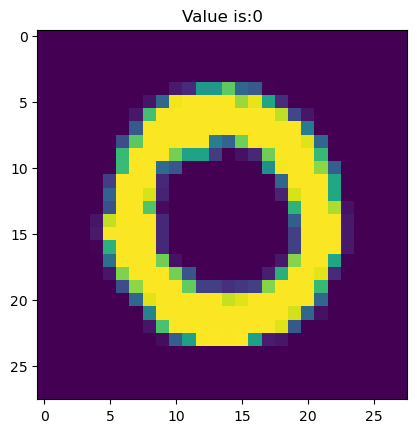

In [8]:
#Visualizing data
import matplotlib. pyplot as plt
plt. imshow(number[1])
plt. title("Value is:%d" % label[1])


In [9]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(number, label, test_size = 0.2, random_state = 40)

In [12]:
#configuring CNN
img_data_gen=ImageDataGenerator()

model=Sequential()

model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model. fit(X_train, y_train, epochs = 50)

Epoch 1/50
1050/1050 [==============================] - 17s 15ms/step - loss: 2.6288 - accuracy: 0.1114
Epoch 2/50
1050/1050 [==============================] - 14s 13ms/step - loss: 2.2888 - accuracy: 0.1144
Epoch 3/50
1050/1050 [==============================] - 13s 12ms/step - loss: 2.1173 - accuracy: 0.1843
Epoch 4/50
1050/1050 [==============================] - 13s 13ms/step - loss: 2.0385 - accuracy: 0.2050
Epoch 5/50
1050/1050 [==============================] - 14s 14ms/step - loss: 2.0087 - accuracy: 0.2099
Epoch 6/50
1050/1050 [==============================] - 14s 13ms/step - loss: 1.9970 - accuracy: 0.2116
Epoch 7/50
1050/1050 [==============================] - 13s 13ms/step - loss: 1.9864 - accuracy: 0.2129
Epoch 8/50
1050/1050 [==============================] - 14s 13ms/step - loss: 1.9807 - accuracy: 0.2119
Epoch 9/50
1050/1050 [==============================] - 16s 15ms/step - loss: 1.9788 - accuracy: 0.2133
Epoch 10/50
1050/1050 [==============================] - 17s 16m

In [19]:
# test using validation set
y_pred = model.predict(X_test)
y_predict = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

263/263 [==============================] - 1s 4ms/step


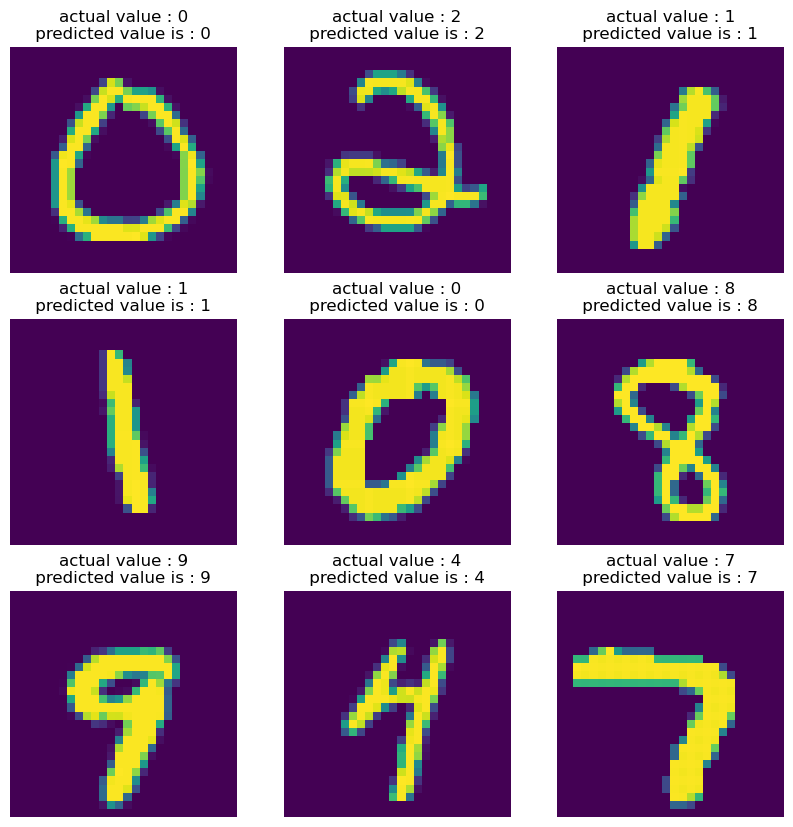

In [20]:
y_list = y_test.to_list()
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title('actual value : %d' %y_list[i]+ '\n predicted value is : %d ' % y_predict[i])